<a href="https://colab.research.google.com/github/Deekshitha0209/Chronic-Kidney-Disease-prediction-using-Machine-learning-methods-/blob/main/Copy_of_C2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**import packages and dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import sklearn as sk
from sklearn.model_selection import train_test_split
f=pd.read_csv('/content/drive/MyDrive/kidney disease dataset.csv')
l1=["id","age","bp","sg","al","su","bgr","bu","sc","sod","pot","hemo","pcv","wc","rc"]
l2=["rbc","pc","pcc","ba","htn","dm","cad","appet","pe","ane","classification"]
f.pcv=pd.to_numeric(f.pcv,errors='coerce')
f.wc=pd.to_numeric(f.wc,errors='coerce')
f.rc=pd.to_numeric(f.rc,errors='coerce')
for i in l2:
    print(f[i].unique())
f.dm=f.dm.replace(to_replace='\tno',value='no')
f.dm=f.dm.replace(to_replace='\tyes',value='yes')
f.dm=f.dm.replace(to_replace=' yes',value='yes')
f.cad=f.cad.replace(to_replace='\tno',value='no')
f.classification=f.classification.replace(to_replace='ckd\t',value='ckd')

In [ ]:
f.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [ ]:
for i in l2:
    print(f[i].unique())
f.classification=f.classification.replace(to_replace='ckd',value='1')
f.classification=f.classification.replace(to_replace='notckd',value='0')
f.classification=pd.to_numeric(f.classification,errors='coerce')
f.info()

[nan 'normal' 'abnormal']
['normal' 'abnormal' nan]
['notpresent' 'present' nan]
['notpresent' 'present' nan]
['yes' 'no' nan]
['yes' 'no' nan]
['no' 'yes' nan]
['good' 'poor' nan]
['no' 'yes' nan]
['no' 'yes' nan]
['ckd' 'notckd']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null

**Fill null values**

In [ ]:
for i in l1:
    f.loc[f[i].isnull(),i]=f[i].mean()

In [ ]:
for i in l2:
    f[i]=f[i].fillna(f[i].mode())
f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    float64
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   rbc             249 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             400 non-null    float64
 11  bu              400 non-null    float64
 12  sc              400 non-null    float64
 13  sod             400 non-null    float64
 14  pot             400 non-null    float64
 15  hemo            400 non-null    float64
 16  pcv             400 non-null    float64
 17  wc              400 non-null    flo

**box plot of attributes**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

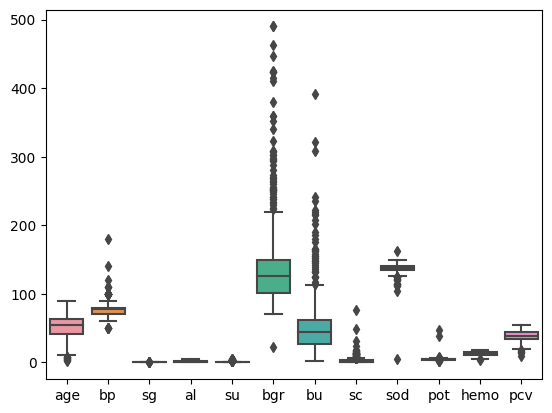

In [ ]:
fig=sns.boxplot(data=f.loc[:,l1[1:-2]])

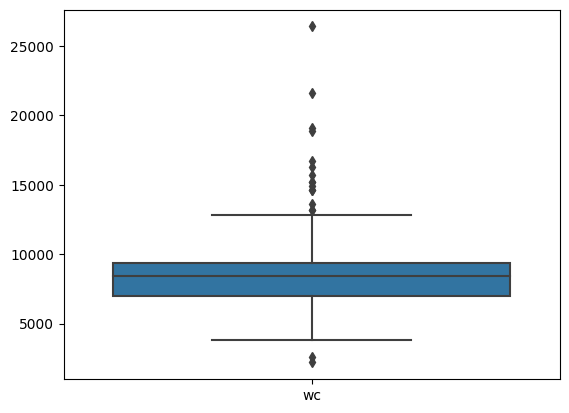

In [ ]:
fo=sns.boxplot(data=f.loc[:,["wc"]])

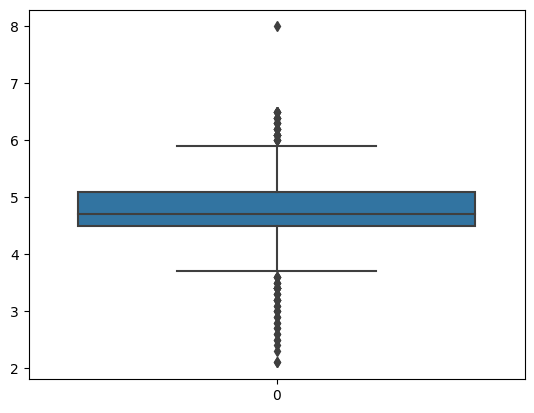

In [ ]:
fo1=sns.boxplot(data=f.loc[:,"rc"])

In [ ]:
import plotly.express as px
f1=px.box(f.loc[:,l1[:-2]],y=l1[:-2])
f1.show()

**Handling outliers**

In [ ]:
import numpy as np
def outlienes(col):

    Q1 = np.percentile(f[col], 25,
                       interpolation = 'midpoint')

    Q3 = np.percentile(f[col], 75,
                       interpolation = 'midpoint')

    per_95 = np.percentile(f[col], 95,
                       interpolation = 'midpoint')

    IQR = Q3 - Q1

    upper = Q3+1.5*IQR
    lower = Q1-1.5*IQR

    f[col] = np.where(f[col] > upper, per_95, f[col])
    f[col] = np.where(f[col] < lower, lower, f[col])

    return f
for col in l1:
    f = outlienes(col)

<ipython-input-33-cdd97787a044>:4: DeprecationWarning:

the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)

<ipython-input-33-cdd97787a044>:7: DeprecationWarning:

the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)

<ipython-input-33-cdd97787a044>:10: DeprecationWarning:

the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)



In [ ]:
f2=px.box(f.loc[:,l1[:-2]],y=l1[:-2])
f2.show()

<Axes: >

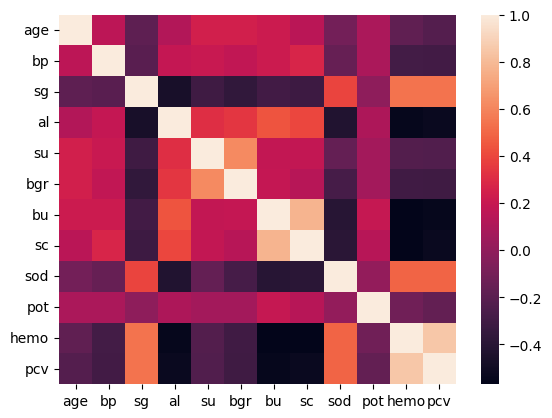

In [ ]:
sns.heatmap(f[l1[1:-2]].corr())

**Converting categorical attributes to numeric**

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in l2:
    f[i]=le.fit_transform(f[i])

In [ ]:
for i in f:
    print(f[i])

0        0.0
1        1.0
2        2.0
3        3.0
4        4.0
       ...  
395    395.0
396    396.0
397    397.0
398    398.0
399    399.0
Name: id, Length: 400, dtype: float64
0      48.0
1       9.0
2      62.0
3      48.0
4      51.0
       ... 
395    55.0
396    42.0
397    12.0
398    17.0
399    58.0
Name: age, Length: 400, dtype: float64
0      80.0
1      55.0
2      80.0
3      70.0
4      80.0
       ... 
395    80.0
396    70.0
397    80.0
398    60.0
399    80.0
Name: bp, Length: 400, dtype: float64
0      1.0200
1      1.0200
2      1.0100
3      1.0075
4      1.0100
        ...  
395    1.0200
396    1.0250
397    1.0200
398    1.0250
399    1.0250
Name: sg, Length: 400, dtype: float64
0      1.0
1      4.0
2      2.0
3      4.0
4      2.0
      ... 
395    0.0
396    0.0
397    0.0
398    0.0
399    0.0
Name: al, Length: 400, dtype: float64
0      0.0
1      0.0
2      3.0
3      0.0
4      0.0
      ... 
395    0.0
396    0.0
397    0.0
398    0.0
399    0.0
Name: 

In [ ]:
f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    float64
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   rbc             400 non-null    int64  
 7   pc              400 non-null    int64  
 8   pcc             400 non-null    int64  
 9   ba              400 non-null    int64  
 10  bgr             400 non-null    float64
 11  bu              400 non-null    float64
 12  sc              400 non-null    float64
 13  sod             400 non-null    float64
 14  pot             400 non-null    float64
 15  hemo            400 non-null    float64
 16  pcv             400 non-null    float64
 17  wc              400 non-null    flo

In [ ]:
from sklearn.model_selection import train_test_split
l3=f.columns
l3=l3[1:-1]
l3=['age', 'bp', 'sg', 'al', 'su', 'rbc', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane']
print(l3)
x_train,x_test,y_train,y_test=train_test_split(f.loc[:,l3],f.classification,test_size=0.3,random_state=0)

['age', 'bp', 'sg', 'al', 'su', 'rbc', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']


In [ ]:
x_train.shape

(280, 20)

In [ ]:
print(x_train.head()

SyntaxError: ignored

In [ ]:
print(y_train.head())

92     1
223    1
234    1
232    1
377    0
Name: classification, dtype: int64


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(splitter="random",random_state=0)
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0, splitter='random')

In [ ]:
from sklearn.metrics import accuracy_score
print("The accuracy of decision tree is:",accuracy_score(y_test,dt.predict(x_test)))

The accuracy of decision tree is: 0.9583333333333334


In [ ]:
t1=pd.read_csv('/content/drive/MyDrive/kidney disease dataset.csv')
t1=t1.dropna()
t1.shape

(158, 26)

In [ ]:
t1. info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 3 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              158 non-null    int64  
 1   age             158 non-null    float64
 2   bp              158 non-null    float64
 3   sg              158 non-null    float64
 4   al              158 non-null    float64
 5   su              158 non-null    float64
 6   rbc             158 non-null    object 
 7   pc              158 non-null    object 
 8   pcc             158 non-null    object 
 9   ba              158 non-null    object 
 10  bgr             158 non-null    float64
 11  bu              158 non-null    float64
 12  sc              158 non-null    float64
 13  sod             158 non-null    float64
 14  pot             158 non-null    float64
 15  hemo            158 non-null    float64
 16  pcv             158 non-null    object 
 17  wc              158 non-null    obj

In [ ]:
for i in l2:
    print(t1[i].unique())

['normal' 'abnormal']
['abnormal' 'normal']
['present' 'notpresent']
['notpresent' 'present']
['yes' 'no']
['no' 'yes']
['no' 'yes']
['poor' 'good']
['yes' 'no']
['yes' 'no']
['ckd' 'notckd']


In [ ]:
t1.wc=pd.to_numeric(t1.wc,errors='coerce')
t1.rc=pd.to_numeric(t1.rc,errors='coerce')
t1.pcv=pd.to_numeric(t1.pcv,errors='coerce')
t1.wc=t1.wc.astype('float64')
t1.classification=t1.classification.replace(to_replace='ckd',value='1')
t1.classification=t1.classification.replace(to_replace='notckd',value='0')
t1.classification=pd.to_numeric(t1.classification,errors='coerce')

In [ ]:
for i in l2:
    if i!="classification":
        t1[i]=le.fit_transform(t1[i])

In [ ]:
t1. info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 3 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              158 non-null    int64  
 1   age             158 non-null    float64
 2   bp              158 non-null    float64
 3   sg              158 non-null    float64
 4   al              158 non-null    float64
 5   su              158 non-null    float64
 6   rbc             158 non-null    int64  
 7   pc              158 non-null    int64  
 8   pcc             158 non-null    int64  
 9   ba              158 non-null    int64  
 10  bgr             158 non-null    float64
 11  bu              158 non-null    float64
 12  sc              158 non-null    float64
 13  sod             158 non-null    float64
 14  pot             158 non-null    float64
 15  hemo            158 non-null    float64
 16  pcv             158 non-null    int64  
 17  wc              158 non-null    flo

In [ ]:
print(t1.classification)

3      1
9      1
11     1
14     1
20     1
      ..
395    0
396    0
397    0
398    0
399    0
Name: classification, Length: 158, dtype: int64


In [ ]:
print(accuracy_score(t1.classification,dt.predict(t1.loc[:,l3])))

1.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=3,random_state=0)
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=3, random_state=0)

In [ ]:
print(accuracy_score(y_test,rf.predict(x_test)))

0.9833333333333333


In [ ]:
print(accuracy_score(t1.classification,rf.predict(t1.loc[:,l3])))

1.0


In [ ]:
print(f.classification)

0      1
1      1
2      1
3      1
4      1
      ..
395    0
396    0
397    0
398    0
399    0
Name: classification, Length: 400, dtype: int64


In [ ]:
t1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 3 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              158 non-null    int64  
 1   age             158 non-null    float64
 2   bp              158 non-null    float64
 3   sg              158 non-null    float64
 4   al              158 non-null    float64
 5   su              158 non-null    float64
 6   rbc             158 non-null    int64  
 7   pc              158 non-null    int64  
 8   pcc             158 non-null    int64  
 9   ba              158 non-null    int64  
 10  bgr             158 non-null    float64
 11  bu              158 non-null    float64
 12  sc              158 non-null    float64
 13  sod             158 non-null    float64
 14  pot             158 non-null    float64
 15  hemo            158 non-null    float64
 16  pcv             158 non-null    int64  
 17  wc              158 non-null    flo

In [ ]:
print(f.loc[3])

id                   3.0000
age                 48.0000
bp                  70.0000
sg                   1.0075
al                   4.0000
su                   0.0000
rbc                  1.0000
pc                   0.0000
pcc                  1.0000
ba                   0.0000
bgr                117.0000
bu                  56.0000
sc                   3.8000
sod                126.0000
pot                  2.8000
hemo                11.2000
pcv                 32.0000
wc                6700.0000
rc                   3.9000
htn                  1.0000
dm                   0.0000
cad                  0.0000
appet                1.0000
pe                   1.0000
ane                  1.0000
classification       1.0000
Name: 3, dtype: float64


In [ ]:
t2=pd.DataFrame({'age':[48,48],'bp':[80,70],'sg':[1.02,1.0075],'al':[1,4],'su':[0,0],'rbc':[1,1],'pc':[1,0],'pcc':[0,1],'ba':[0,0],'bgr':[121,117],'bu':[36,56],'sc':[1.2,3.8],'sod':[137.52,126],'pot':[4.6,2.8],'hemo':[15.4,11.2],'pcv':[44,32],'wc':[7800,6700],'rc':[5.2,3.9],'htn':[1,1],'dm':[1,0],'cad':[0,0],'appet':[0,1],'pe':[0,1],'ane':[0,1]})

In [ ]:
print(t2)

   age  bp      sg  al  su  rbc  pc  pcc  ba  bgr  ...  hemo  pcv    wc   rc  \
0   48  80  1.0200   1   0    1   1    0   0  121  ...  15.4   44  7800  5.2   
1   48  70  1.0075   4   0    1   0    1   0  117  ...  11.2   32  6700  3.9   

   htn  dm  cad  appet  pe  ane  
0    1   1    0      0   0    0  
1    1   0    0      1   1    1  

[2 rows x 24 columns]


In [ ]:
print(rf.predict(t2.loc[:,l3]))

[0 1]


In [ ]:
import pickle
import numpy as np
model=pickle.load(open("/content/drive/MyDrive/rf.pkl","rb"))
def prediction(age=40,bp=80,sg=127.0,al=1,su=1,rbc=1,bgr=102.1,bu=13.2,sc=120.2,sod=10,pot=22,hemo=180,wc=7800,rc=9,htn=0,dm=0,cad=0,appeit=1,pe=0,ane=0):
    return model.predict([[age,bp,sg,al,su,rbc,bgr,bu,sc,sod,pot,hemo,wc,rc,htn,dm,cad,appeit,pe,ane]])

age=60
bp=90
sg=127.0
al=1
su=1
rbc=0
bgr=102.1
bu=13.2
sc=120.2
sod=10
pot=22
hemo=180
wc=7800
rc=9
htn=1
dm=1
cad=1
appeit=1
pe=0
ane=0


x=prediction(age,bp,float(sg),al,su,rbc,float(bgr),float(bu),float(sc),float(sod),float(pot),float(hemo),int(wc),float(rc),htn,dm,cad,appeit,pe,ane)
if(x==0):
    print("The patient don't have the disease")
elif(x==1):
    print("The patient has the disease")

The patient has the disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.1.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.1.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
import pickle
import numpy as np
model=pickle.load(open("/content/drive/MyDrive/rf.pkl","rb"))
def prediction(age=40,bp=80,sg=127.0,al=1,su=1,rbc=1,bgr=102.1,bu=13.2,sc=120.2,sod=10,pot=22,hemo=180,wc=7800,rc=9,htn=0,dm=0,cad=0,appeit=1,pe=0,ane=0):
    return model.predict([[age,bp,sg,al,su,rbc,bgr,bu,sc,sod,pot,hemo,wc,rc,htn,dm,cad,appeit, pe, ane]])

age=23
bp=60
sg=120
al=0
su=0
rbc=1
bgr=95
bu=24
sc=80
sod=145
pot=5
hemo=15
wc=6300
rc=4.6
htn=0
dm=0
cad=0
appeit=0
pe=0
ane=0


x=prediction(age,bp,float(sg),al,su,rbc,float(bgr),float(bu),float(sc),float(sod),float(pot),float(hemo),int(wc),float(rc),htn,dm,cad,appeit,pe,ane)
if(x==0):
    print("The patient don't have the disease")
elif(x==1):
    print("The patient has the disease")

The patient don't have the disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning:

Trying to unpickle estimator DecisionTreeClassifier from version 1.1.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning:

Trying to unpickle estimator RandomForestClassifier from version 1.1.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



In [ ]:
! pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 48.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 57.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 18.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.6 MB/s eta 0:00:00


In [ ]:
%%writefile app.py
import streamlit as st
import pickle
import numpy as np
model = pickle.load(open("/content/drive/MyDrive/rf.pkl","rb"))
st.title("Chronic Kidney Disease Prediction")
age = st.number_input("what is your age:",0,100)
bp = st.number_input("bp",0,180)
sg = st.text_input("specific gravity")
al = st.selectbox("albumin range", [0,1,2,3,4,5])
su = st.selectbox("sugar level", [0,1,2,3,4,5])
rbc = st.selectbox("redblood cell levels:",["normal", "abnormal"])
if(rbc=="normal"):
	rbc=1
else:
	rbc=2
bgr = st.text_input("blood glucose random: ")
bu = st.text_input("blood urea:")
sc = st.text_input("serum:")
sod = st.text_input("sodium:")
pot = st.text_input("potissum:")
hemo = st.text_input("hemoglobin:")
wc = st.text_input("white blood count: ")
rc = st.text_input("red blood count:")
htn = st.selectbox("do you have hypertension:",["yes","no"])
if(htn=="yes"):
	htn=1
else:
	htn=0
dm = st.selectbox("do you have diabatic millets", ["yes", "no"])
if(dm=="yes"):
	dm=1
else:
	dm=0
cad = st.selectbox("do you have heart disease:",["yes","no"])
if(cad=="yes"):
	cad=1
else:
	cad=0
appeit = st.selectbox("how is your appitite",["good","poor"])
if(appeit=="good"):
	appeit=0
else:
	appeit=1
pe = st.selectbox("do you have swollen legs",["yes","no"])
if(pe=="yes"):
	pe=1
else:
	pe=0
ane = st.selectbox("do you have anemia:",["yes","no"])
if(ane=="yes"):
	ane=1
else:
	ane=0
#function to predict the result
def prediction(age=40, bp=80, sg=127.0, al=1, su=1, rbc=1, bgr=102.1, bu=13.2, sc=120.2, sod=10, pot=22, hemo=180, wc=7800, rc=9, htn=0, dm=0, cad=0, appeit=1 , pe=0 , ane=0 ):
	return model.predict([[age,bp,sg,al,su, rbc,bgr, bu, sc,sod, pot, hemo, wc,rc,htn, dm, cad, appeit, pe, ane]])

x=2


#Displaying the results
if(st.button("predict")):
	x=prediction(age,bp,float(sg),al,su,rbc,float(bgr),float(bu),float(sc),float(sod),float(pot),float(hemo),int(wc),float(rc),htn,dm,cad,appeit,pe,ane)

if(x==0):
	st.success("The patient dont't have the disease")
elif(x==1):
	st.error("The patient has the disease")
else:
  print("Invalid value")

Writing app.py


In [ ]:
!streamlit run app.py  & npx localtunnel --port 8501

/bin/bash: streamlit: command not found
npx: installed 22 in 4.949s
your url is: https://dark-cities-dress-34-74-179-130.loca.lt
